# Data Mining

This NoteBook is dedicated to:

1. Data Cleaning and Preprocessing
2. Train and evaluating 4 different data mining models to understand complex patterns within collected data

the DM models as one of the critical components of a Decision support system will detect lying patterns and relations within data.

## Required Packages

In [1]:
import sys

sys.path.append(r"h:\Resume\Projects\DataScience\Banking Telemarketing Decision Support System\Project")

import pandas as pd
import numpy as np

import importlib

from src.data_preprocessing import preprocess_pipeline

import src.data_ingestion as load
from src.models.model_selection import train_log_models
from configs.config_repository import ConfigRepository

## Data Prepration

### Loading the data

In [2]:
df_train = load.load_csv_to_dataframe(file_path = '../data//raw/bank-full.csv')
df_test = load.load_csv_to_dataframe(file_path = '../data/raw/bank.csv' )

Dataset loaded successfully with 45211 rows and 17 columns.
Dataset loaded successfully with 4521 rows and 17 columns.


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Looking at the data composition 

searching for any harsh anomalies within the data


From Exploratory data analysis we know that the collected data doesn't show any abnormality .

### Data Cleaning
* Remove duplicate rows.
* Handle missing values.
* Correct textual inconsistencies
* removing outliers

### Data Transformation

* convert categorical variable into one_hot vector
* data normalization

#### Loading configuration for preprocessing

In [5]:
y_train = df_train['y']
X_train = df_train.drop(columns=['y'])
 

y_test = df_test['y']
X_test = df_test.drop(columns=['y'])

In [6]:
# get the name of columns

cat_columns = X_train.select_dtypes(include='object').columns.tolist()
num_columns = X_train.select_dtypes(include='number').columns.tolist()

In [7]:
print(cat_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [8]:
cr = ConfigRepository(config_path="../configs/models_config.json")
# fe_config = cr.get_config("fe_config")

In [9]:
# fetch the preprocessing pipeline
preprocess_pipe = preprocess_pipeline(
    
    num_columns=num_columns,
    cat_columns=cat_columns,
    missing_method='drop',  # or 'fill'
    fill_value=None,
    fill_method=None,
    missing_threshold=0.5,
    outlier_removal=False,
)

In [10]:
preprocessed_test = preprocess_pipe.fit_transform(X_test, y_test)

In [11]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [12]:
y_test.to_frame()

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


Models:   0%|          | 0/1 [00:00<?, ?model/s]2025-06-25 23:32:19 — INFO — Training LogisticRegression (1/1)…


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 20
max_resources_: 45211
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2260
n_resources: 20
Fitting 5 folds for each of 2260 candidates, totalling 11300 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4520 fits failed out of a total of 11300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4520 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mehri

----------
iter: 1
n_candidates: 754
n_resources: 60
Fitting 5 folds for each of 754 candidates, totalling 3770 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.99000975 0.5        1.        ]
  warnings.warn(


----------
iter: 2
n_candidates: 252
n_resources: 180
Fitting 5 folds for each of 252 candidates, totalling 1260 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.95775918 0.5        1.        ]
  warnings.warn(


----------
iter: 3
n_candidates: 84
n_resources: 540
Fitting 5 folds for each of 84 candidates, totalling 420 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.94493765 0.70497497 0.96098738]
  warnings.warn(


----------
iter: 4
n_candidates: 28
n_resources: 1620
Fitting 5 folds for each of 28 candidates, totalling 140 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.92685603 0.82370431 0.93223977]
  warnings.warn(


----------
iter: 5
n_candidates: 10
n_resources: 4860
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91223736 0.87281105 0.91111309]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.92015415 0.8742236  0.92120734]
  warnings.warn(


----------
iter: 6
n_candidates: 4
n_resources: 14580
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.90735748 0.90734278 0.90739027]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.91257256 0.91256492 0.91223485]
  warnings.warn(


----------
iter: 7
n_candidates: 2
n_resources: 43740
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.90739027 0.91028818 0.91022756]
  warnings.warn(
c:\Users\mehri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.91223485 0.91091443 0.91083538]
  warnings.warn(
2025/06/25 23:46:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LogReg' already exists. Creating a new version of this model...
Created version '6' of model 'LogReg'.
2025-06-25 23:46:55 — INFO — Evaluating LogisticRegression on test set…
Models: 100%|██████████| 1/1 [14:35<00:00, 875.59s/model]
2025-06-25 23:46:55 — INFO

Model registered: LogReg


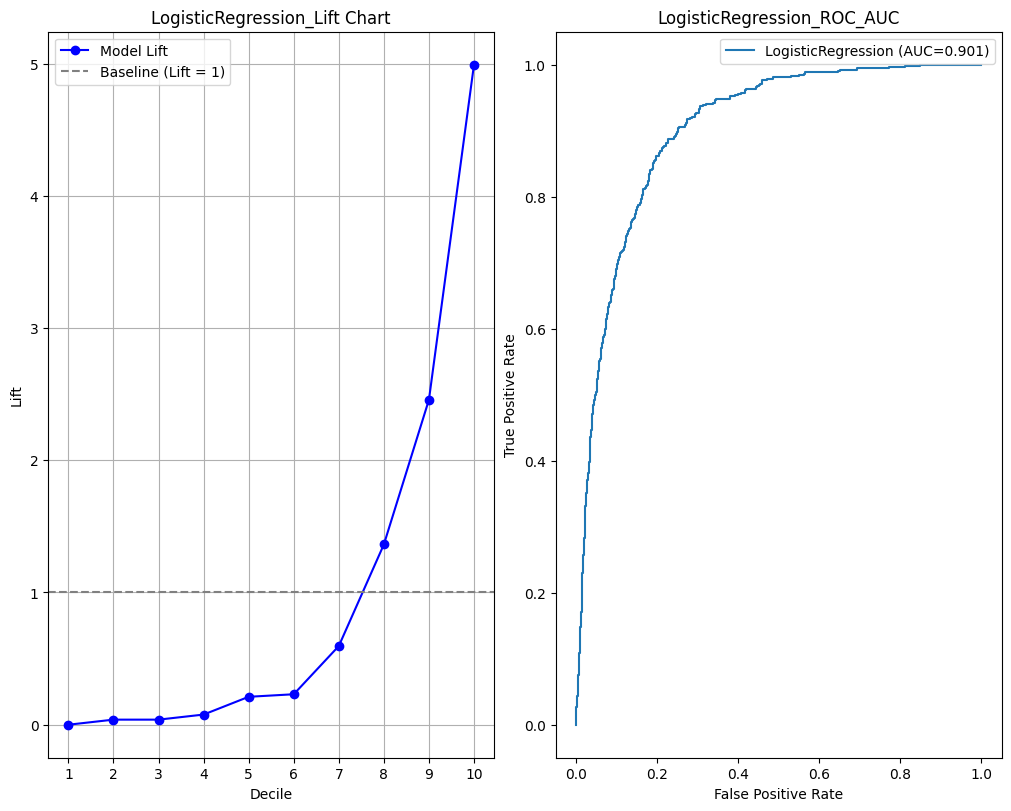

{'LogisticRegression': {'model': Pipeline(steps=[('preprocess',
                   FunctionTransformer(func=<bound method Pipeline.fit_transform of Pipeline(steps=[('cleaning', DataCleaningTransformer()),
                  ('column_transformer',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['age', 'balance', 'day',
                                                     'duration', 'campaign',
                                                     'pdays', 'previous']),
                                                   ('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                             

In [13]:
train_log_models(
                X_train=X_train,
                y_train=y_train,
                X_test=X_test,
                y_test=y_test,
                preprocessing_pipeline = preprocess_pipe,
                models_name=["LogisticRegression"],
                visualize = True,
                )


the best performance on the test set is belong to Multilayer preceptron 

now we should prepare reference and training pipelines for it.